#開始

In [1]:
import csv
import pandas as pd
import os
import glob
encoding = 'SHIFT_JIS'
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

In [2]:
#files = glob.glob('/content/*.csv')
files = os.listdir('/content')
for file in files:
  print(file)


.config
062701.csv
062702.csv
sample_data


# データ変更

In [109]:
file_name = "062702.csv" # @param {type:"string"}
t = 0.52 # @param {type:"number"}
w = 0.003 # @param {type:"number"}
x = 0.01 # @param {type:"number"}

df = pd.read_csv("/content/"+file_name, encoding=encoding, skiprows=15)#
df = df.drop(df.columns[[0, -1]], axis=1)
#df = df.iloc[:, :-11]
#df = df.iloc[:, 12:]
df = df - t
m = df.median().median()
#df[(df>=m-w)&(df<=m+w)] = m
#df.to_csv(file_name+'(z).csv', index=False)

pall = df[(df>=m-w)&(df<=m+w)].count().sum()   /df.size
pinn = df.iloc[9:120,9:120][(df>=m-w)&(df<=m+w)].count().sum() /df.iloc[9:120, 9:120].size
#pinn = df.iloc[4:60,9:120][(df>=m-w)&(df<=m+w)].count().sum() /df.iloc[4:60,9:120].size
pall =round(pall*100,1)
pinn =round(pinn*100,1)

グラフ

062702.csv.png


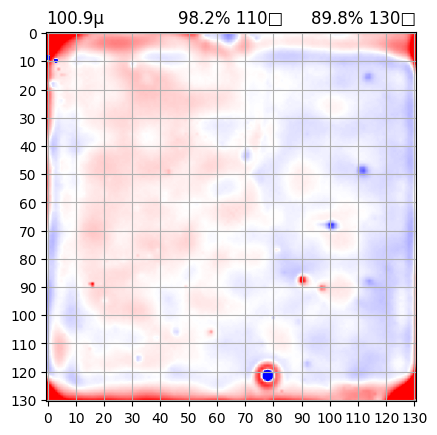

In [89]:
norm = mcolors.Normalize(vmin=m-x, vmax=m+x)#(vmin=df.min().min(), vmax=df.max().max())
cmap = plt.get_cmap('bwr')
fig, ax = plt.subplots()
im = ax.imshow(df, cmap=cmap, norm=norm)

ax.set_xticks(np.arange(0, 131, step=10))
ax.set_yticks(np.arange(0, 131, step=10))
ax.set_title(str(round(m*1000,1))+"µ", loc='left') #makuatsu
ax.set_title(str(pall)+"% 130□", loc='right')
ax.set_title(str(pinn)+"% 110□", loc='center')
ax.grid()
#ax.set_ylim(10, 140)#ax.set_xlim(-65,65)
print(file_name+".png")
#fig.colorbar(im)
plt.show()#

等高線

In [91]:
df.to_csv(file_name+'(z).csv', index=False)
fig.savefig("img.png",transparent=True)

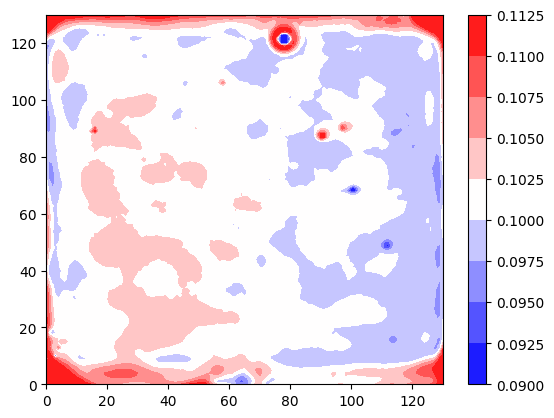

In [110]:
df[(df>=m+x)] = m+x
df[(df<=m-x)] = m-x
plt.contourf( df.values,cmap=cmap)
plt.colorbar() # Add a colorbar to show the values
plt.show()
#print(m-x,m+x)

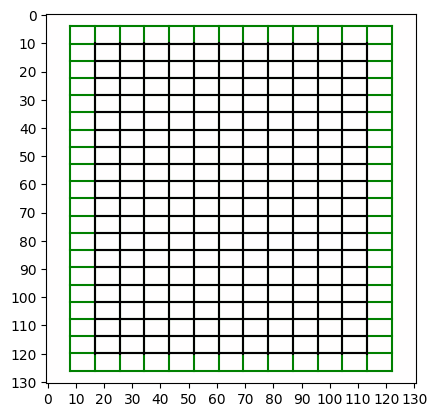

In [86]:
fig, ax = plt.subplots()
#df[(df<=9)] = m
im = ax.imshow(df, cmap=cmap, norm=norm)

ax.set_xticks(np.arange(0, 131, step=10))
ax.set_yticks(np.arange(0, 131, step=10))
#ax.set_title(str(round(m*1000,1))+"µ", loc='left') #makuatsu
#ax.set_title(str(pall)+"% 130□", loc='right')
#ax.set_title(str(pinn)+"% 110□", loc='center')

for i in range(0, 14, 1):
    plt.plot([(130-114)/2+i*114/13, (130-114)/2+i*114/13], [(130-122)/2, (130+122)/2], color='green')
for j in range(0, 21, 1):
    plt.plot([(130-114)/2, (130+114)/2],[(130-122)/2+j*122/20, (130-122)/2+j*122/20], color='green')
for i in range(1, 13, 1):
    plt.plot([(130-114)/2+i*114/13, (130-114)/2+i*114/13], [(130-110)/2, (130+110)/2], color='black')
for j in range(1, 20, 1):
    plt.plot([(130-95)/2, (130+95)/2],[(130-122)/2+j*122/20, (130-122)/2+j*122/20], color='black')


plt.show()

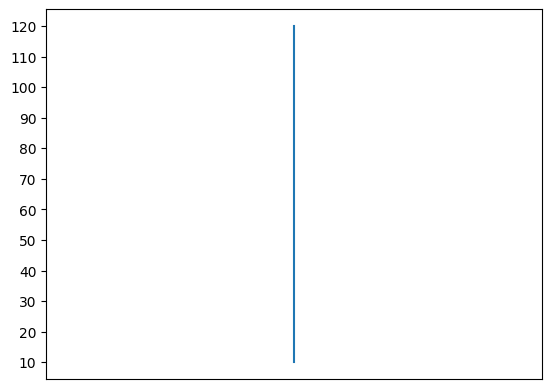

In [60]:
fig, ax = plt.subplots()
ax.set_xticks(np.arange(0, 131, step=10))
ax.set_yticks(np.arange(0, 131, step=10))
plt.plot([65, 65], [10, 120])
plt.show()

In [61]:
plt.show()